<a href="https://colab.research.google.com/github/Elfaria-Wistoria/Rice-Quality-Multilabel-Classification-CNN/blob/main/Rice_Quality_Multilabel_Classification_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Jenis-Beras

/content/drive/MyDrive/Jenis-Beras


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XPz8IvmCCH2im2pUuuTT")
project = rf.workspace("gunawan-selayar-xjkcv").project("jenis-beras")
version = project.version(1)
dataset = version.download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Jenis-Beras-1 in multiclass:: 100%|██████████| 934/934 [00:07<00:00, 126.39it/s]


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import os

In [ ]:
def load_annotations(data_dir, csv_file):
    annotations = pd.read_csv(os.path.join(data_dir, csv_file))
    annotations['filename'] = annotations['filename'].apply(lambda x: os.path.join(data_dir, x))
    return annotations

train_annotations = load_annotations('/content/drive/MyDrive/Jenis-Beras/Jenis-Beras-1/train', '_classes.csv')
val_annotations = load_annotations('/content/drive/MyDrive/Jenis-Beras/Jenis-Beras-1/valid', '_classes.csv')
test_annotations = load_annotations('/content/drive/MyDrive/Jenis-Beras/Jenis-Beras-1/test', '_classes.csv')

print(train_annotations.head())
print(train_annotations.columns)

                                            filename   Beras-Medium  \
0  /content/drive/MyDrive/Jenis-Beras/Jenis-Beras...              0   
1  /content/drive/MyDrive/Jenis-Beras/Jenis-Beras...              0   
2  /content/drive/MyDrive/Jenis-Beras/Jenis-Beras...              1   
3  /content/drive/MyDrive/Jenis-Beras/Jenis-Beras...              0   
4  /content/drive/MyDrive/Jenis-Beras/Jenis-Beras...              0   

    Beras-Premium   Beras-Tidak-Layak  
0               1                   0  
1               0                   1  
2               0                   0  
3               1                   0  
4               1                   0  
Index(['filename', ' Beras-Medium', ' Beras-Premium', ' Beras-Tidak-Layak'], dtype='object')


In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_annotations,
    x_col='filename',
    y_col=[' Beras-Medium', ' Beras-Premium', ' Beras-Tidak-Layak'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='raw'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_annotations,
    x_col='filename',
    y_col=[' Beras-Medium', ' Beras-Premium', ' Beras-Tidak-Layak'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='raw'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_annotations,
    x_col='filename',
    y_col=[' Beras-Medium', ' Beras-Premium', ' Beras-Tidak-Layak'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False
)

Found 646 validated image filenames.
Found 187 validated image filenames.
Found 93 validated image filenames.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=30  # Adjust the number of epochs based on your data
)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 365s 13s/step - accuracy: 0.4189 - loss: 0.6563 - val_accuracy: 0.6375 - val_loss: 0.5289
Epoch 2/30
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6250 - loss: 0.5190

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6250 - loss: 0.5190 - val_accuracy: 0.5926 - val_loss: 0.5414
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 320ms/step - accuracy: 0.6136 - loss: 0.5362 - val_accuracy: 0.6313 - val_loss: 0.5132
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 0.5029 - val_accuracy: 0.7407 - val_loss: 0.4507
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.6153 - loss: 0.5175 - val_accuracy: 0.7188 - val_loss: 0.5001
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7500 - loss: 0.4826 - val_accuracy: 0.6296 - val_loss: 0.4913
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 364ms/step - accuracy: 0.6994 - loss: 0.4696 - val_accuracy: 0.6562 - val_loss: 0.4762
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.5424 - val_accuracy: 0.5926 - val_loss: 0.5070
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.6802 - loss: 0.4883 - val_accuracy: 0.7000 - val_lo

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=30  # Adjust the number of epochs based on your data
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 535ms/step - accuracy: 0.7607 - loss: 0.3879 - val_accuracy: 0.7937 - val_loss: 0.3255
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7812 - loss: 0.4048 - val_accuracy: 0.6667 - val_loss: 0.4001
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step - accuracy: 0.7817 - loss: 0.3246 - val_accuracy: 0.8125 - val_loss: 0.2986
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8750 - loss: 0.2430 - val_accuracy: 0.7407 - val_loss: 0.3583
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - accuracy: 0.8390 - loss: 0.2850 - val_accuracy: 0.8250 - val_loss: 0.2659
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.3450 - val_accuracy: 0.8889 - val_loss: 0.2073
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.8473 - loss: 0.2495 - val_accuracy: 0.8188 - val_loss: 0.2834
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7500 - loss: 0.3009 - val_accuracy: 0.8

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Prediksi
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return prediction

# Contoh prediksi
sample_image_path = '/content/drive/MyDrive/Jenis-Beras/Jenis-Beras-1/test/-112-_jpg.rf.a93040f0246ee6c10a7d90b520104934.jpg'
prediction = predict_image(sample_image_path)
print(f"Prediksi: {prediction}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 14s/step - accuracy: 0.9209 - loss: 0.1416
Test Accuracy: 93.55%
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediksi: [[0.0072907  0.98989284 0.00316311]]


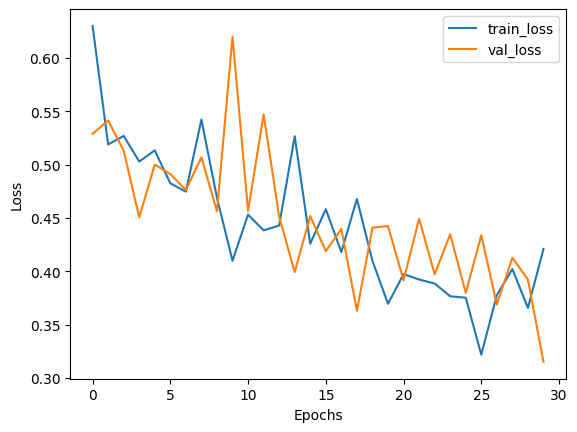

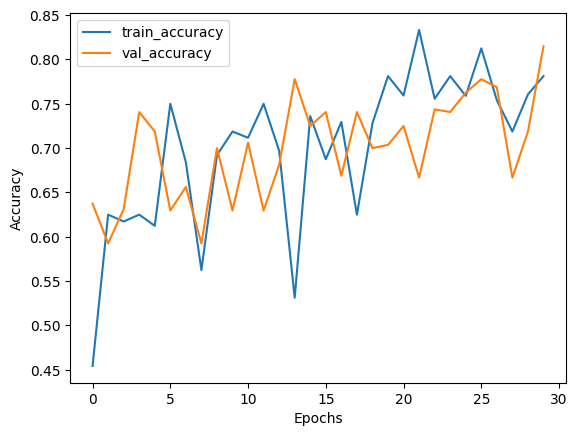

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss

# Asumsikan y_true dan y_pred adalah nilai sebenarnya dan prediksi dari set pengujian
y_true = test_generator.labels
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_true, y_pred_binary))
print("Hamming Loss:", hamming_loss(y_true, y_pred_binary))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.84      1.00      0.91        31
           2       0.97      0.97      0.97        30

   micro avg       0.92      0.95      0.93        93
   macro avg       0.92      0.95      0.93        93
weighted avg       0.92      0.95      0.93        93
 samples avg       0.92      0.95      0.93        93

Hamming Loss: 0.04659498207885305


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('rice_classification_model.h5')

In [ ]:
import tensorflow as tf

# Konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('rice_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpsxb7do2s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136768645543744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768639179536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768639175664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628267616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628271840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628272192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628621904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628625776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628627008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136768628629648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13676862863000